In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
import statsmodels.api as sm



#### 1. Modelo de regresión lineal que explique el número de viajes a partir del resto de las variables encontradas en la base de datos adjunta.
#### 2. Conclusión sobre la significancia estadística de cada variable.
#### 3. Interpretación de los coeficientes.

#### El diccionario de la base de datos es el siguiente:

#### trips : número de viajes en bote realizados en el lago Somerville

#### quality : percepción subjetiva de la calidad de 1 a 5

#### ski factor: pregunta acerca de si el individuo hizo o no water-ski en el lago Somerville

#### income: ingreso anual en miles de dólares 
#### userfee factor: pago de suscripción anual al lago 

####  costC: costo de visitar Lago Conroe (alternativa al lago Somerville) 

####  costS: costo de visitar Lago Somerville 

####  costH: costo de visitar Lago Houston (alternativa al lago Somerville) ####

**Solución**

In [23]:
df = pd.read_csv("recdemand.csv")

In [24]:
df

,trips,quality,ski,income,userfee,costC,costS,costH
0,0,0,yes,4,no,67.59,68.620,76.800
1,0,0,no,9,no,68.86,70.936,84.780
2,0,0,yes,5,no,58.12,59.465,72.110
3,0,0,no,2,no,15.79,13.750,23.680
4,0,0,yes,3,no,24.02,34.033,34.547
...,...,...,...,...,...,...,...,...
654,40,5,yes,5,yes,25.63,18.916,29.684
655,40,3,yes,3,no,18.46,13.330,25.800
656,40,2,yes,4,no,58.84,47.000,62.760
657,50,4,yes,4,no,35.67,25.694,37.269


In [25]:
df = df[["trips","quality", "ski", "income","userfee", "costC", "costS", "costH"]]

In [26]:
df

,trips,quality,ski,income,userfee,costC,costS,costH
0,0,0,yes,4,no,67.59,68.620,76.800
1,0,0,no,9,no,68.86,70.936,84.780
2,0,0,yes,5,no,58.12,59.465,72.110
3,0,0,no,2,no,15.79,13.750,23.680
4,0,0,yes,3,no,24.02,34.033,34.547
...,...,...,...,...,...,...,...,...
654,40,5,yes,5,yes,25.63,18.916,29.684
655,40,3,yes,3,no,18.46,13.330,25.800
656,40,2,yes,4,no,58.84,47.000,62.760
657,50,4,yes,4,no,35.67,25.694,37.269


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   trips    659 non-null    int64  
 1   quality  659 non-null    int64  
 2   ski      659 non-null    object 
 3   income   659 non-null    int64  
 4   userfee  659 non-null    object 
 5   costC    659 non-null    float64
 6   costS    659 non-null    float64
 7   costH    659 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 41.3+ KB


In [28]:
df = df.replace({"ski" :{"yes":1 , "no" :0}})
df = df.replace({"userfee" :{"yes":1 , "no" :0}})

In [29]:
df

,trips,quality,ski,income,userfee,costC,costS,costH
0,0,0,1,4,0,67.59,68.620,76.800
1,0,0,0,9,0,68.86,70.936,84.780
2,0,0,1,5,0,58.12,59.465,72.110
3,0,0,0,2,0,15.79,13.750,23.680
4,0,0,1,3,0,24.02,34.033,34.547
...,...,...,...,...,...,...,...,...
654,40,5,1,5,1,25.63,18.916,29.684
655,40,3,1,3,0,18.46,13.330,25.800
656,40,2,1,4,0,58.84,47.000,62.760
657,50,4,1,4,0,35.67,25.694,37.269


In [34]:
df[["trips","ingreso", "calidad"]].corr()

,trips,ingreso,calidad
trips,1.000000,-0.06003,0.386351
ingreso,-0.060030,1.00000,0.037420
calidad,0.386351,0.03742,1.000000


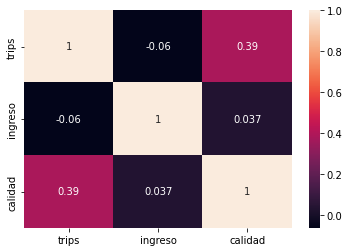

In [35]:
sns.heatmap(df[["trips","ingreso", "calidad"]].corr(),annot=True)

In [30]:
df = df.rename(columns={"ski":"ski_factor" , "userfee" : "userfee_factor", "quality" : "calidad", "income":"ingreso"})

In [31]:
y = df["trips"]
x = df[["calidad", "ski_factor","ingreso", "userfee_factor", "costC", "costS", "costH"]] 
x = sm.add_constant(x)
model = sm.OLS(y,x)
reg = model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trips   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     36.02
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           1.29e-42
Time:                        19:04:15   Log-Likelihood:                -2038.8
No. Observations:                 659   AIC:                             4094.
Df Residuals:                     651   BIC:                             4130.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.5615      0.572      4.479      0.000       1.439       3.685
calidad            0.9134      0.125      7.305      0.000       0.668       1.159
ski_factor         0.9992      0.462      2.161      0.031       0.091       1.907
ingreso           -0.2071      0.119     -1.734      0.083      -0.442       0.027
userfee_factor     8.2808      1.543      5.368      0.000       5.251      11.310
costC              0.0632      0.034      1.841      0.066      -0.004       0.131
costS             -0.1645      0.023     -7.236      0.000      -0.209      -0.120
costH              0.0895      0.028      3.177      0.002       0.034       0.145
==============================================================================
Omnibus:                      925.235   Durbin-Watson:                   0.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           238996.003
Skew:                           7.395   Prob(JB):                         0.00
Kurtosis:                      95.115   Cond. No.                         938.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Respuestas:



###  **2. Conclusión sobre la significancia estadística de cada variable.**

##### Cuanto más pequeño sea el p valor, esto significa la probabilidad de que la hipótesis nula sea cierta. Por otro lado, encontramos que si este valor p es reducido, más certero es el resultado final de la investigación. Por lo tanto, encontramos 5 variables significativas, que son estas:
##### **- calidad:** **P>|t|: 0.000** En este caso encontramos que la hipótesis nula es falsa, y de igual manera indica que el resultado es importante a la hora de realizar una cierta cantidad de viajes en bote en el lago Somerville.
##### **- ski_factor:** **P>|t|: 0.031** En este caso encontramos que la hipótesis nula es falsa, y de igual manera indica que el resultado es importante a la hora de realizar una cierta cantidad de viajes en bote en el lago Somerville.
##### Para ser escueto con las tres últimas variables encontramos que rechazan la hipótesis nula:
##### **- userfee_factor: P>|t|: 0.000** 
##### **- costS: P>|t|: 0.000**
##### **- costH: P>|t|: 0.000**

##### Las variables que no son significativas y aceptan la hipotesis nula son las siguientes: ** el ingreso y los costC**. Es decir que la hipótesis nula de estas dos variables es cierta, por lo tanto, son las menos fiables en el resultado de la investigación.
### **3. Interpretación de los coeficientes.**
##### - En la variable **calidad**, encontramos que aumenta el coeficiente, es decir, en promedio 0.91 de realizar más viajes en bote en el lago Somerville.
##### - En la variable **ski_factor**, encontramos que aumenta el coeficiente, es decir, en promedio 0.99 de realizar más viajes en bote en el lago Somerville.
##### - En la variable **ingreso**, encontramos que disminuye el coeficiente, es decir, en promedio 0.207 de realizar más viajes en bote en el lago Somerville.
##### - En la variable **pago de suscripción anual al lago o el userfree_factor**, encontramos que aumenta el coeficiente, es decir, en promedio 8.28 de realizar más viajes en bote en el lago Somerville.
##### - En la variable **costC**, encontramos que aumenta el coeficiente, es decir, en promedio 0.06 de realizar más viajes en bote en el lago Somerville.
##### - En la variable **costS**, encontramos que disminuye el coeficiente, es decir, en promedio 0.164 de realizar más viajes en bote en el lago Somerville.
##### - En la variable **costH**, encontramos que aumenta el coeficiente, es decir, en promedio 0.089 de realizar más viajes en bote en el lago Somerville.
